# Imports
<hr>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Features Description
<hr>

In [2]:
with open("DATA/Ames_Housing_Feature_Description.txt", mode='r') as file:
    print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# Load Data
<hr>

In [3]:
df = pd.read_csv('DATA/Ames_Housing_Data.csv')

In [4]:
df.head(5)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Size of the DataFrame

In [5]:
print(f"Number of features : {len(df.columns)}")

Number of features : 81


In [6]:
print(f"Number of data points : {len(df)}")

Number of data points : 2930


### Features Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

### Removing the PID

We already have an index, so we don't need the PID unique identifier for the regression we will perform later on.

In [8]:
df.drop('PID', axis=1, inplace=True)

# Exploratory Data Analysis
<hr>

### SalePrice - Target Feature

<Figure size 800x600 with 0 Axes>

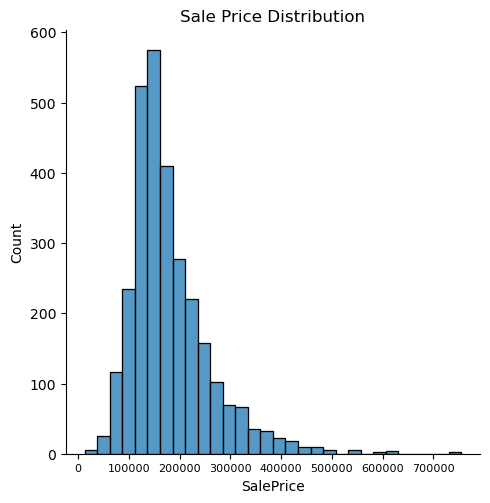

In [9]:
plt.figure(figsize=(8,6))
sns.displot(df['SalePrice'], bins=30)
plt.xticks(fontsize=8)
plt.title('Sale Price Distribution');

The distribution of SalePrice is right-skewed.

### Most Significant Numerical Features

Top 10 numerical variables highly correlated with SalePrice:

In [10]:
df.corr()["SalePrice"].sort_values(ascending=False)[:10]

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Name: SalePrice, dtype: float64

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [12]:
linear_model = LinearRegression()
rfe = RFE(estimator=linear_model, n_features_to_select=10, step=1)
rfe.fit(df.drop('SalePrice', axis=1).fillna(0).select_dtypes(exclude='object'), df.SalePrice)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [13]:
selectedFeatures = list(df.drop('SalePrice', axis=1).select_dtypes(exclude='object').columns[rfe.support_])

In [14]:
selectedFeatures

['Overall Qual',
 'Overall Cond',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars']

According to above analyses, Overall Quality, Living Area, Number of Full Baths, Size of Garage and Year Built are some of the most important features in determining house price.

#### Overall Quality

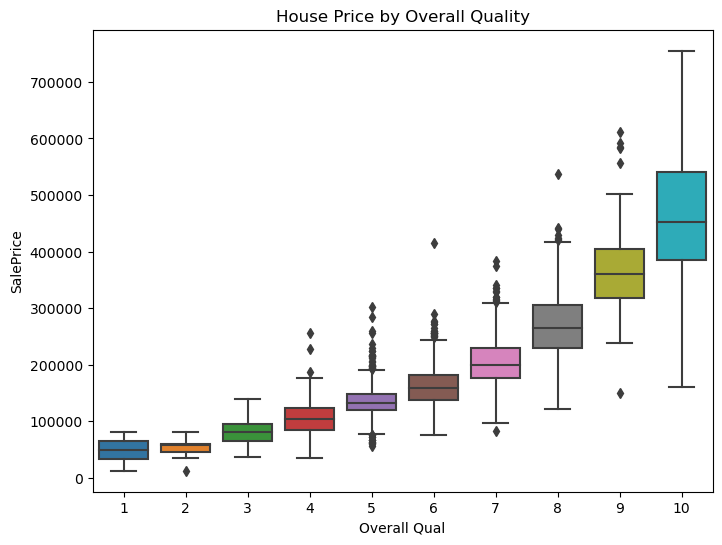

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Overall Qual', y='SalePrice')
plt.title('House Price by Overall Quality');

Overall quality is the most important feature in both analyses. It is clear that higher quality makes the house more expensive.

#### Garage Cars

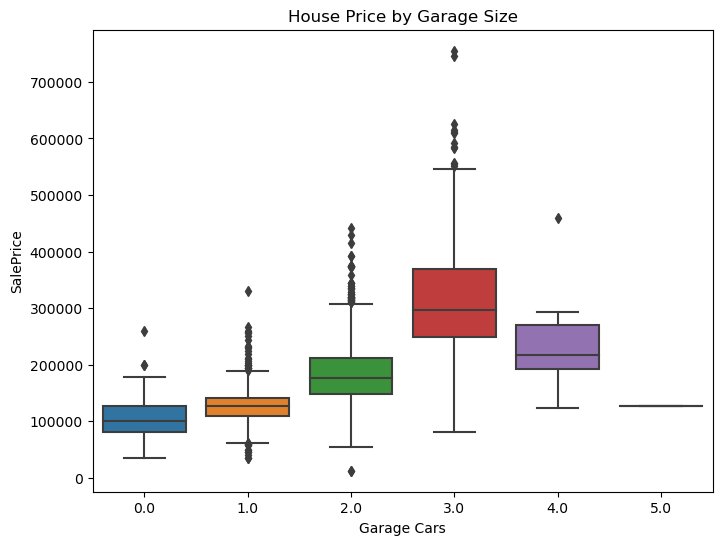

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Garage Cars', y='SalePrice')
plt.title('House Price by Garage Size');

Interestingly, houses with garage which can hold 4 cars are cheaper than houses with 3-car garage.

#### Year Built

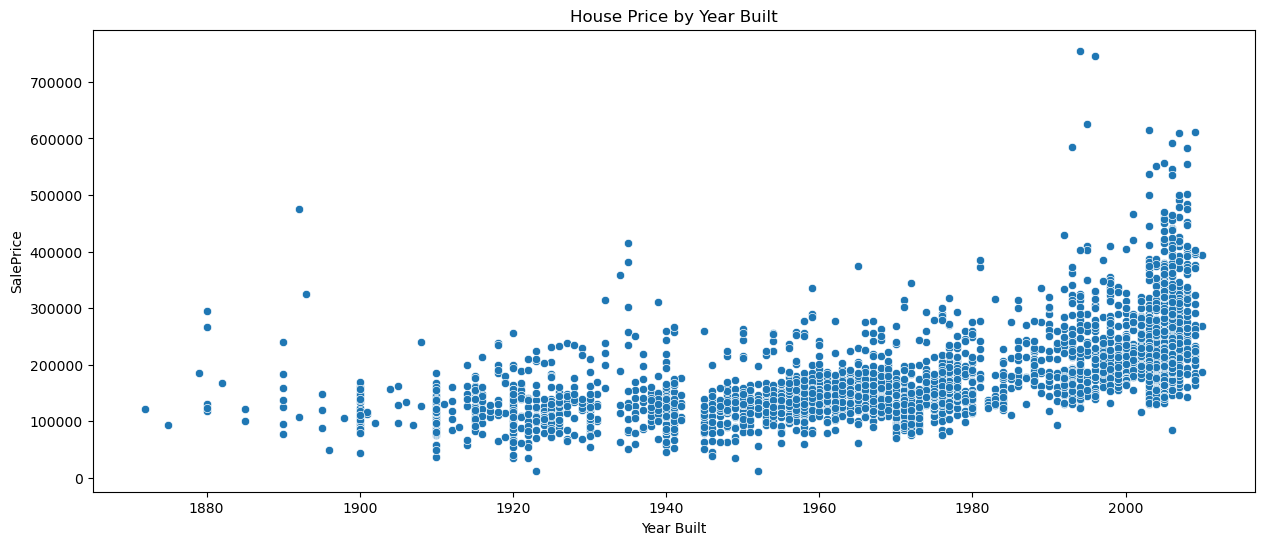

In [17]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Year Built', y='SalePrice', data=df)
title = plt.title('House Price by Year Built')


The age of the house also plays an important role in its price. Newer houses have higher average prices. There are several houses built before 1900 having a high price.

### Categorical Variables

#### Neighborhood

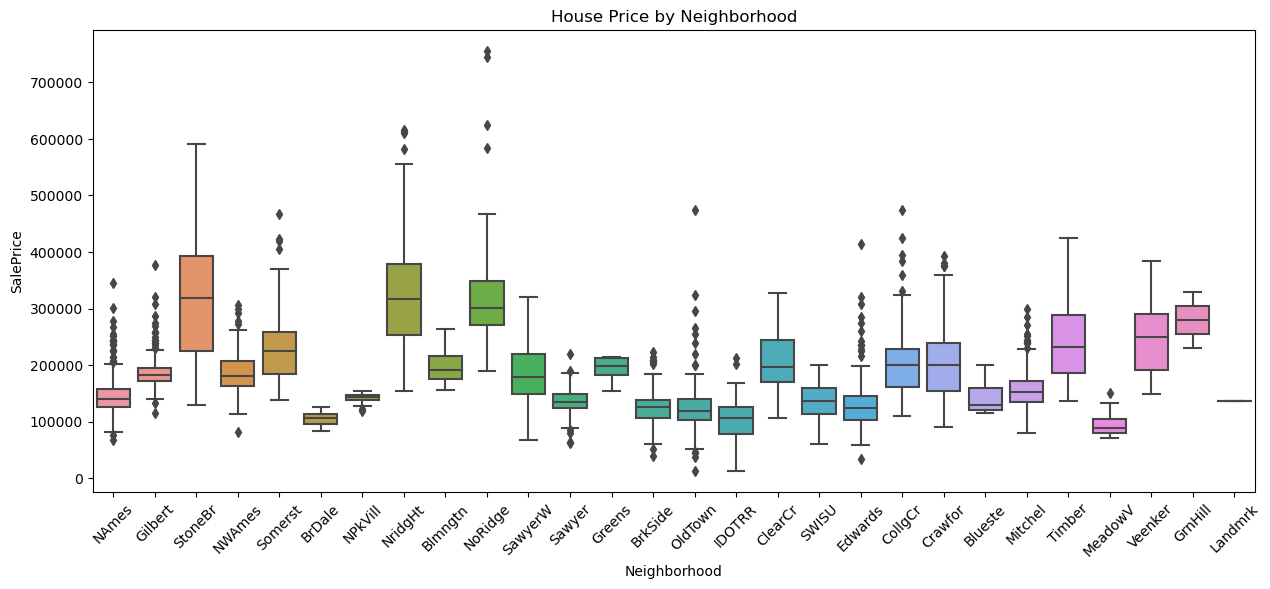

In [18]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.title('House Price by Neighborhood')
plt.xticks(rotation=45);

There is a big difference in house prices among neighborhood in Ames. The top 3 expensive neighborhoods are NridgHt, NoRidge and StoneBr with median house prices of approximately $300,000, three times as high as the median of the 3 cheapest neighborhoods, which are BrDale, DOTRR and MeadowV.

#### Kitchen Quality

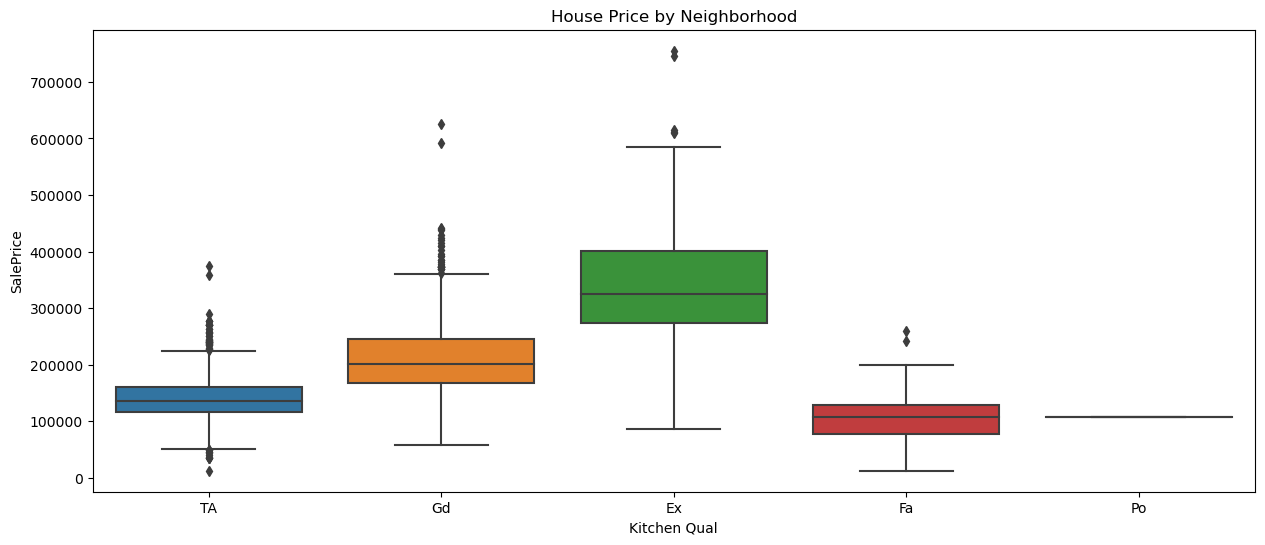

In [19]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Kitchen Qual', y='SalePrice', data=df)
plt.title('House Price by Neighborhood');

Kitchen Quality is another important feature to predict house price. There is a very big difference in price between houses with different kitchen quality. For example, the average price difference between a house with a good kitchen and one with an excellent kitchen is about $120,000.

### Correlations

In [20]:
shape = df.corr().shape
mask = np.triu(np.ones(shape))

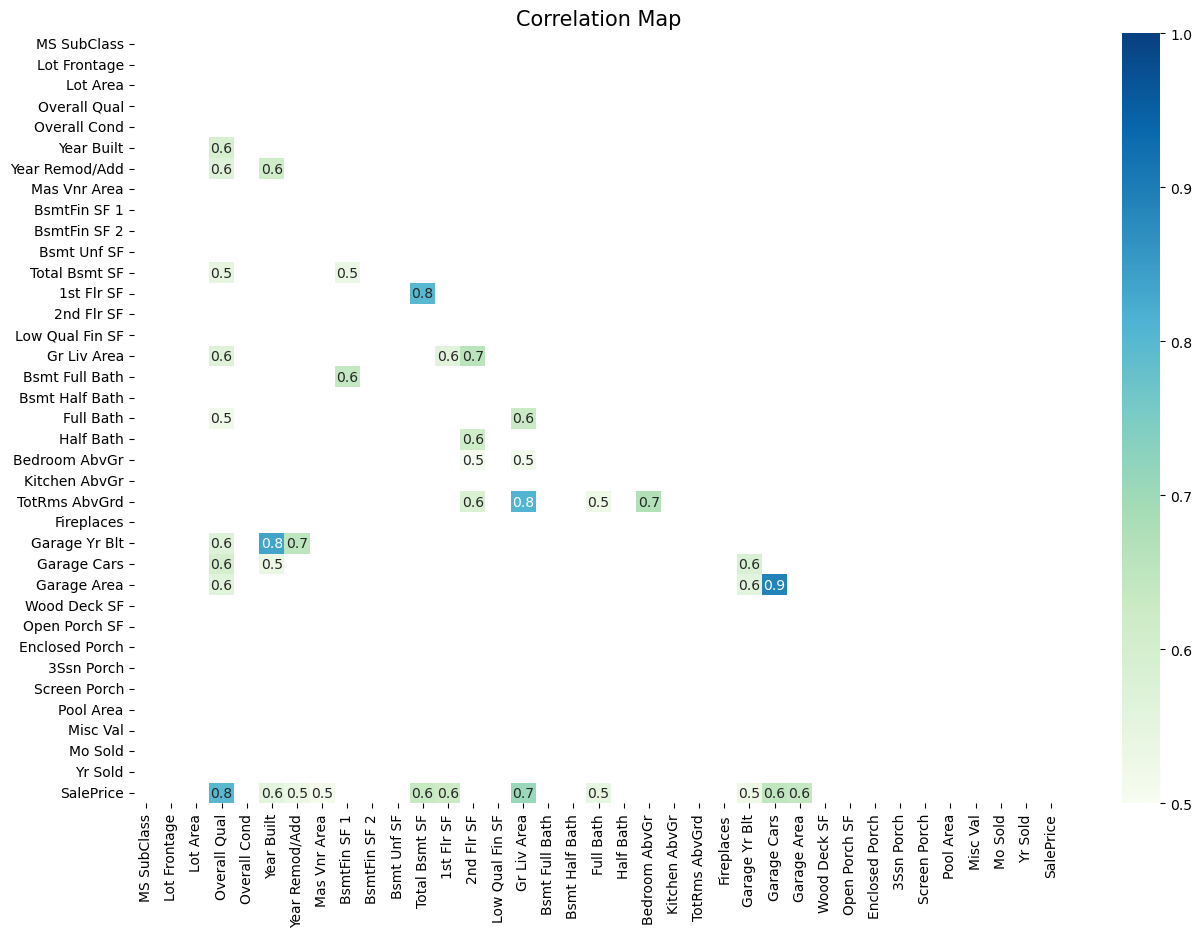

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr()[abs(df.corr() > .5)], annot=True, cmap='GnBu', vmin=0.5, vmax=1, mask=mask, fmt='.1f')
plt.yticks(fontsize=10);
plt.xticks(fontsize=10)
plt.title('Correlation Map', fontsize=15);

There is multicollinearity in our training data. Below features are highly correlated:

- GarageCars and GarageArea
- GarageYrBlt and YearBuilt
- 1stFlrSF and TotalBsmtSF
- GrLivArea and TotRmsAbvGrd

Multicolliniearity has a negative impact on our prediction models and makes standard errors of our estimates increase. Therefore, for each pair of highly correlated features, I will remove a feature that has a lower correlation with SalePrice.

In [22]:
df.corr()['SalePrice'][['Garage Cars', 'Garage Area']]

Garage Cars    0.647877
Garage Area    0.640401
Name: SalePrice, dtype: float64

In [23]:
df.corr()['SalePrice'][['1st Flr SF', 'Total Bsmt SF']]

1st Flr SF       0.621676
Total Bsmt SF    0.632280
Name: SalePrice, dtype: float64

In [24]:
df.corr()['SalePrice'][['Garage Yr Blt', 'Year Built']]

Garage Yr Blt    0.526965
Year Built       0.558426
Name: SalePrice, dtype: float64

In [25]:
df.corr()['SalePrice'][['Gr Liv Area', 'TotRms AbvGrd']]

Gr Liv Area      0.706780
TotRms AbvGrd    0.495474
Name: SalePrice, dtype: float64

# Cleaning Data - NaN Values 
<hr>

## Observing NaN Values

In [26]:
df.isna().sum().sort_values(ascending=False)[:10]

Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Fireplace Qu     1422
Lot Frontage      490
Garage Cond       159
Garage Finish     159
Garage Yr Blt     159
Garage Qual       159
dtype: int64

In [27]:
((100 * df.isna().sum() / len(df)).round(2)).sort_values(ascending=False)[:10]

Pool QC          99.56
Misc Feature     96.38
Alley            93.24
Fence            80.48
Fireplace Qu     48.53
Lot Frontage     16.72
Garage Cond       5.43
Garage Finish     5.43
Garage Yr Blt     5.43
Garage Qual       5.43
dtype: float64

In [28]:
def percent_missing(df: pd.DataFrame) -> pd.Series:
    """
    Calculate the percentage of missing values for each column in a Pandas DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame for which missing values need to be calculated.

    Returns:
        pd.Series: A Pandas Series containing the percentage of missing values for each column with missing data.
    """
    # Calculate the percentage of missing values for each column
    prc_missing = (100 * df.isna().sum() / len(df)).round(2).sort_values()
    
    # Filter out columns with no missing values (percentage = 0)
    prc_missing = prc_missing[prc_missing > 0]
    
    return prc_missing

In [29]:
prc_missing = percent_missing(df)

In [30]:
prc_missing

Total Bsmt SF      0.03
Electrical         0.03
Bsmt Unf SF        0.03
Garage Area        0.03
BsmtFin SF 1       0.03
BsmtFin SF 2       0.03
Garage Cars        0.03
Bsmt Half Bath     0.07
Bsmt Full Bath     0.07
Mas Vnr Area       0.78
Mas Vnr Type       0.78
BsmtFin Type 1     2.73
Bsmt Cond          2.73
Bsmt Qual          2.73
BsmtFin Type 2     2.76
Bsmt Exposure      2.83
Garage Type        5.36
Garage Finish      5.43
Garage Yr Blt      5.43
Garage Qual        5.43
Garage Cond        5.43
Lot Frontage      16.72
Fireplace Qu      48.53
Fence             80.48
Alley             93.24
Misc Feature      96.38
Pool QC           99.56
dtype: float64

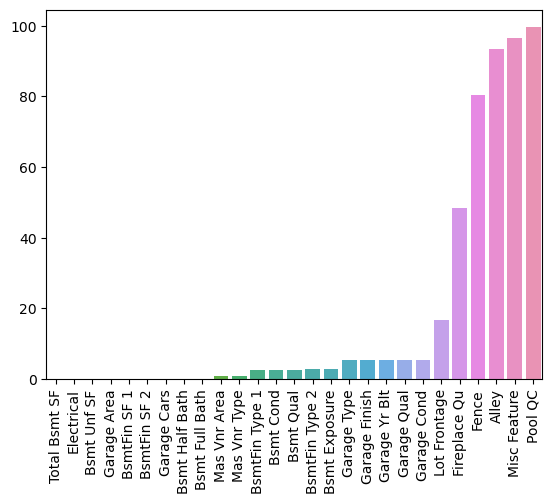

In [31]:
sns.barplot(x=prc_missing.index, y=prc_missing.values)
plt.xticks(rotation=90);

## Cleaning NaN Values
### Rows:

#### First Approach : Filling in Data
Choosing 1% as a threshold to fill in missing data

In [32]:
prc_missing[prc_missing < 1]

Total Bsmt SF     0.03
Electrical        0.03
Bsmt Unf SF       0.03
Garage Area       0.03
BsmtFin SF 1      0.03
BsmtFin SF 2      0.03
Garage Cars       0.03
Bsmt Half Bath    0.07
Bsmt Full Bath    0.07
Mas Vnr Area      0.78
Mas Vnr Type      0.78
dtype: float64

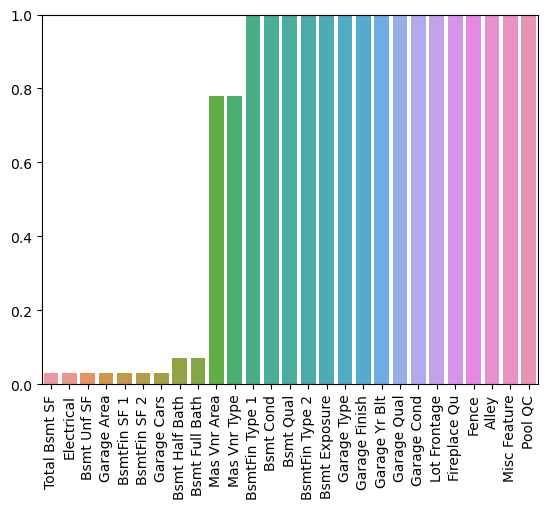

In [33]:
sns.barplot(x=prc_missing.index, y=prc_missing.values)
plt.xticks(rotation=90)
plt.ylim(0,1);

**Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.**

The numerical basement columns:

In [34]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF',
                 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Area']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

The string basement columns:

In [35]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

Based on the Description Text File, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before.

In [36]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

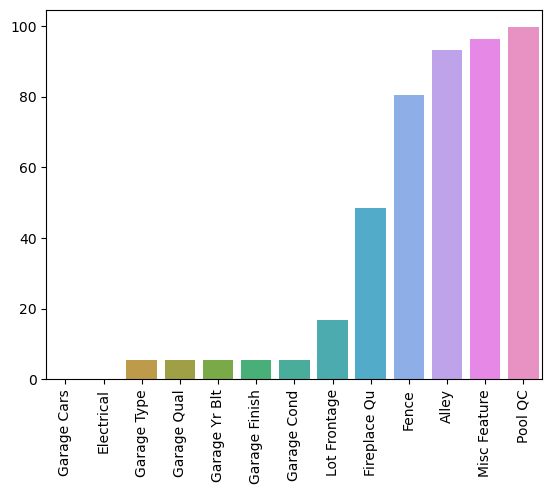

In [37]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

#### Second Approach : Dropping Rows

In [38]:
df = df.dropna(axis=0, subset=['Electrical'])

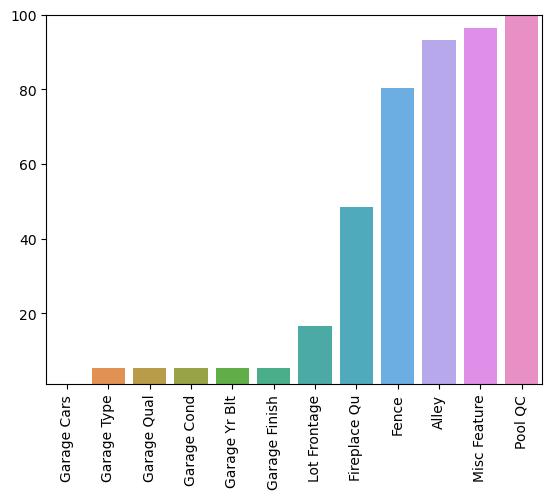

In [39]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(1,100);

### Columns

#### First Approach : Filling in Data

<h5> Garage Columns</h5>
Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [40]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


In [41]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df.loc[:, gar_str_cols].fillna('None')

In [42]:
percent_nan = percent_missing(df)

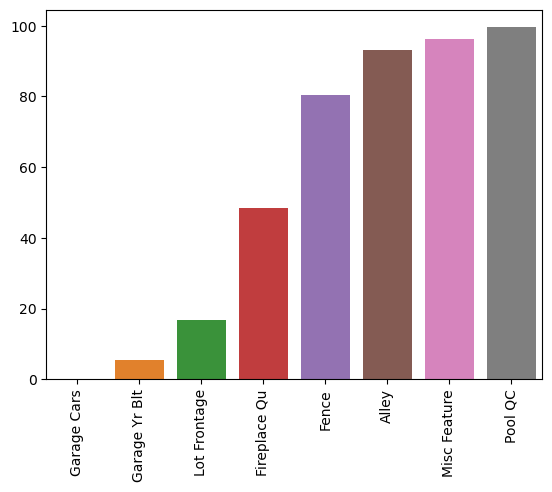

In [43]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [44]:
percent_nan

Garage Cars       0.03
Garage Yr Blt     5.43
Lot Frontage     16.73
Fireplace Qu     48.51
Fence            80.47
Alley            93.24
Misc Feature     96.38
Pool QC          99.56
dtype: float64

#### Second Approach: Dropping Feature Columns

Sometimes you may want to take the approach that above a certain missing percentage threshold, you will simply remove the feature from all the data. For example if 99% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. In our particular data set, many of these high percentage NaN features are actually plasceholders for "none" or 0. But for the sake of showing variations on dealing with missing data, we will remove these features, instead of filling them in with the appropriate value.

In [45]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2925,37.0,NaN,GdPrv,NaN,NaN,NaN
2926,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,62.0,NaN,MnPrv,NaN,Shed,NaN
2928,77.0,TA,NaN,NaN,NaN,NaN


In [46]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence', 'Fireplace Qu'],axis=1)

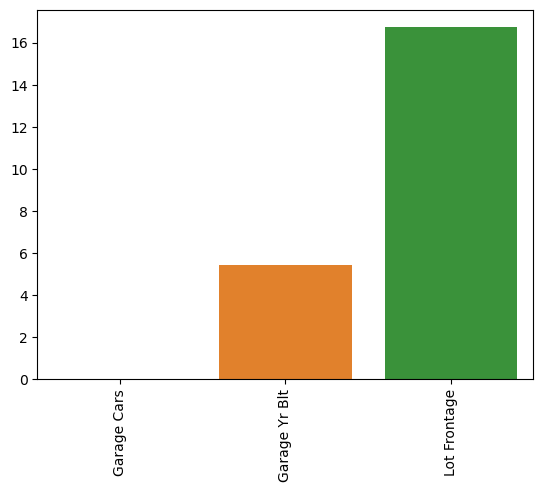

In [47]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Imputation of Missing Data


To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [48]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.910112
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.241379
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [49]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [50]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [51]:
percent_nan = percent_missing(df)

In [52]:
percent_nan

Garage Cars      0.03
Garage Yr Blt    5.43
dtype: float64

### Outliers

Because regression models are very sensitive to outlier, we need to be aware of them. Let's examine outliers with a scatter plot.

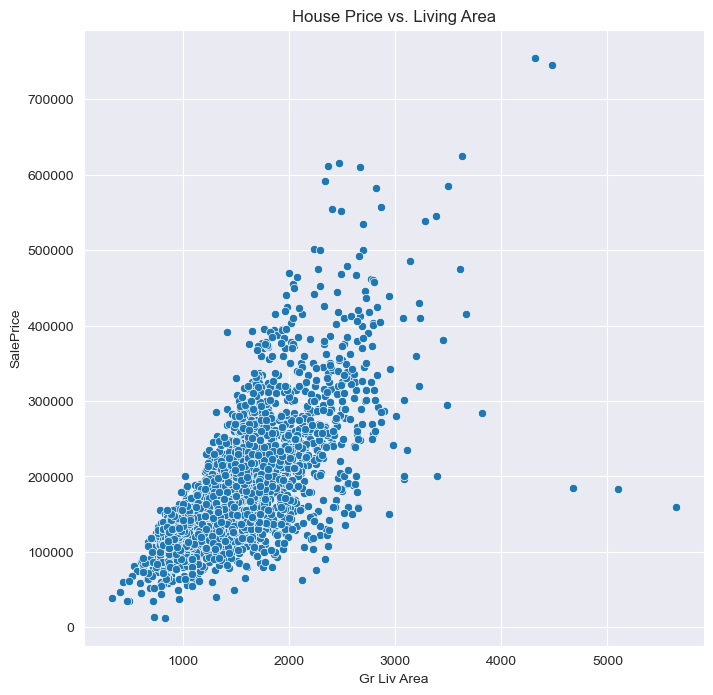

In [53]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')
plt.title('House Price vs. Living Area');

In [54]:
outlier_index = df[(df.SalePrice < 200_000) & (df["Gr Liv Area"] > 4000)].index

In [55]:
df.drop(outlier_index, axis=0, inplace=True)

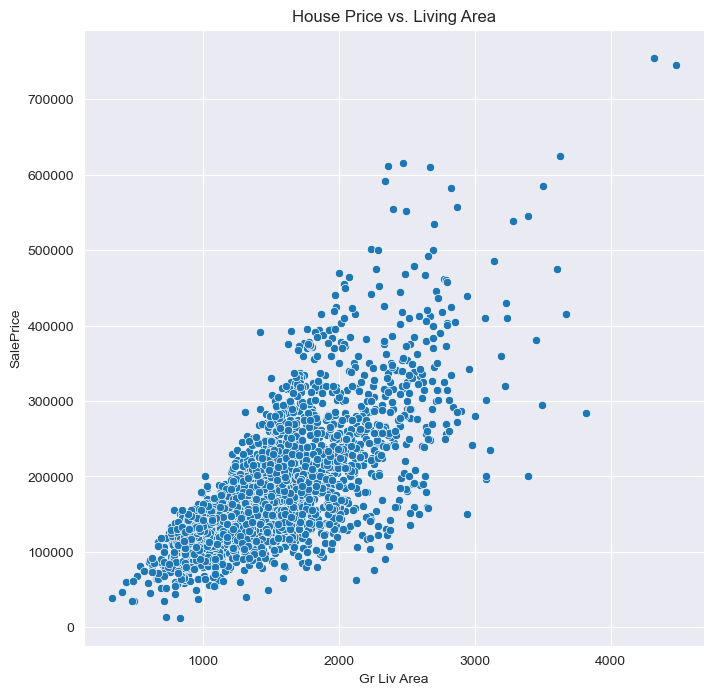

In [56]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')
plt.title('House Price vs. Living Area');

There are two observations lying separately from the rest. They have large living area but low price. They are the outliers that we are looking for. I will delete them from the training set.

# Feature Engineering
<hr>

#### Creating New Features

In [57]:
df['totalSqFeet'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']

In [58]:
df['totalBathroom'] = df['Full Bath'] + df['Bsmt Full Bath'] + 0.5 * (df['Half Bath'] + df['Bsmt Half Bath'])

In [59]:
df['houseAge'] = df['Yr Sold'] - df['Year Built']
df['reModeled'] = np.where(df['Year Remod/Add'] == df['Year Built'], 0, 1)
df['isNew'] = np.where(df['Yr Sold'] == df['Year Built'], 1, 0)

# Skewness and Normalizing Variables
<hr>

Transfoming skewed data will help our models perform better.

### Target Variable

In [60]:
from scipy import stats
from scipy.stats import norm

In [61]:
def normality_plot(X : pd.Series):    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Create a distribution plot
    sns.histplot(X, ax=axes[0], kde=True)
    axes[0].set_title('Distribution Plot')

    # Fit a normal distribution to the data and create a probability plot
    (mu, sigma) = norm.fit(X)
    axes[1] = stats.probplot(X, plot=plt)
    plt.tight_layout()

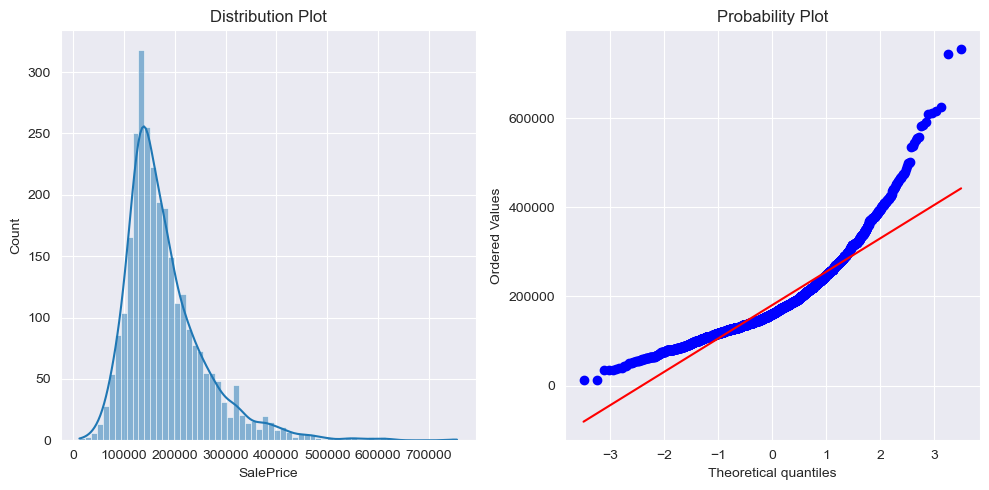

In [62]:
normality_plot(df.SalePrice)

A technique for normalizing right-skewed data involves applying a log transformation, which has the effect of shifting larger values towards the central range. However, it's important to note that when dealing with values of zero, the natural logarithm (log(0)) results in a NaN (Not-a-Number) output. To address this issue and mitigate skewness, I will use the log(1+X) transformation instead.

In [63]:
df.SalePrice = np.log(1 + df.SalePrice)

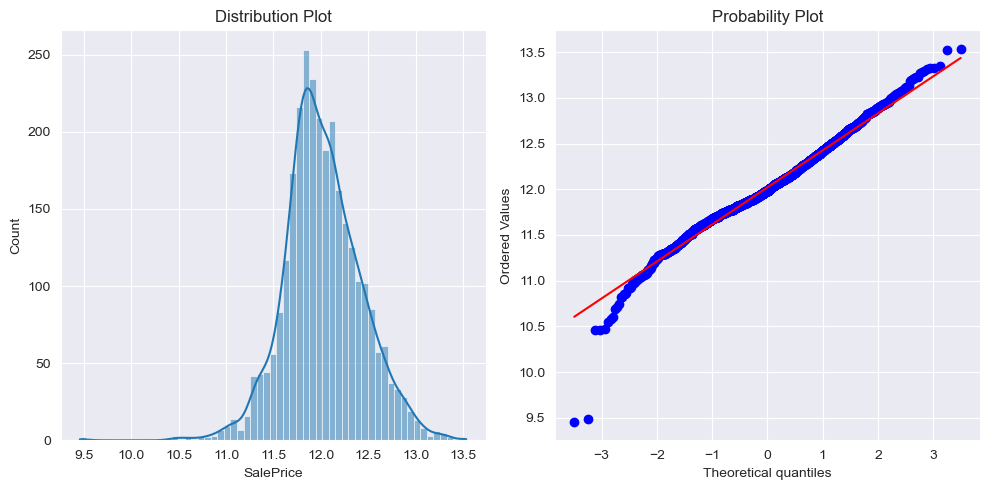

In [64]:
normality_plot(df.SalePrice)

some numerical variables don't have any ordinal meaning (e.g. Mo Sold, MS SubClass and Yr Sold). I will transform them into categorical variables.

In [65]:
num_to_cat_cols = ['Yr Sold', 'Mo Sold', 'MS SubClass']

In [66]:
for col in num_to_cat_cols:
    df[col] = df[col].apply(str)

### Fixing skewness in other numerical variables

In [67]:
df.select_dtypes(exclude='object').skew()[abs(df.select_dtypes(exclude='object').skew()) > 0.75].sort_values(ascending=False)

Misc Val           22.228804
Pool Area          17.725279
Lot Area           13.183206
Low Qual Fin SF    12.109736
3Ssn Porch         11.395843
isNew               4.767652
Kitchen AbvGr       4.310424
BsmtFin SF 2        4.137532
Enclosed Porch      4.011358
Screen Porch        3.954290
Bsmt Half Bath      3.953725
Mas Vnr Area        2.599661
Open Porch SF       2.494865
Wood Deck SF        1.844540
Lot Frontage        1.010923
Gr Liv Area         0.976239
1st Flr SF          0.950912
Bsmt Unf SF         0.924092
2nd Flr SF          0.866510
BsmtFin SF 1        0.830400
dtype: float64

In [68]:
skewed_cols = df.select_dtypes(exclude='object').skew()[abs(df.select_dtypes(exclude='object').skew()) > 0.75].index
for col in skewed_cols:
    df[skewed_cols] = np.log(df[skewed_cols] + 1)

# Scaling Features
<hr>

In order to scale features I will be using RobustScaler because it is designed to be robust against outliers. It scales the features based on the interquartile range (IQR) and median. It subtracts the median and scales by the IQR, which makes it robust to the influence of outliers.

In [69]:
from sklearn.preprocessing import RobustScaler

In [70]:
scaler = RobustScaler()

In [71]:
num_cols = df.drop('SalePrice', axis=1).select_dtypes(exclude='object').columns

In [72]:
df[num_cols] = scaler.fit_transform(df[num_cols])

# One-hot Encoding
<hr>

#### Deleting redundant Features:

In [73]:
df.drop(['Garage Cars', '1st Flr SF', 'Garage Yr Blt', 'TotRms AbvGrd', '1st Flr SF',
         '2nd Flr SF', 'Full Bath', 'Bsmt Full Bath', 'Half Bath', 'Bsmt Half Bath',
         'Yr Sold', 'Year Built', 'Year Remod/Add', 'Year Built'], axis=1, inplace=True)

In [74]:
df_obj = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

In [75]:
df_num

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Low Qual Fin SF,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,totalSqFeet,totalBathroom,houseAge,reModeled,isNew
0,2.152885,2.510782,0.0,0.0,0.997332,0.002722,0.000000,-0.038815,0.177515,0.0,...,0.0,0.000000,0.0,0.000000,12.278398,0.291277,0.0,0.340426,0.0,0.0
1,0.451255,0.467746,-0.5,1.0,0.000000,0.001217,0.109714,-0.433157,-0.213018,0.0,...,0.0,0.109568,0.0,0.000000,11.561725,-0.677623,-1.0,0.319149,0.0,0.0
2,0.492161,0.911019,0.0,1.0,0.997052,0.004360,0.000000,-0.101724,0.668639,0.0,...,0.0,0.000000,0.0,0.111789,12.055256,0.212389,-0.5,0.382979,0.0,0.0
3,0.935366,0.378278,0.5,0.0,0.000000,0.004960,0.000000,0.546138,2.209073,0.0,...,0.0,0.000000,0.0,0.000000,12.404928,1.792162,1.5,0.170213,0.0,0.0
4,0.190404,0.844715,-0.5,0.0,0.000000,0.003690,0.000000,-1.077383,-0.122288,0.0,...,0.0,0.000000,0.0,0.000000,12.154258,0.110240,0.5,-0.446809,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,-2.494341,-0.397883,0.0,1.0,0.000000,0.003843,0.000000,-0.781214,0.025641,0.0,...,0.0,0.000000,0.0,0.000000,11.867104,-0.447029,0.0,-0.255319,0.0,0.0
2926,0.242325,-0.135948,-0.5,0.0,0.000000,-0.001134,0.110273,-0.539700,-0.248521,0.0,...,0.0,0.000000,0.0,0.000000,11.782960,-0.689760,0.0,-0.234043,0.0,0.0
2927,-0.429403,0.230084,-0.5,0.0,0.000000,-0.000505,0.000000,0.154300,-0.153846,0.0,...,0.0,0.000000,0.0,0.110701,11.790565,-0.572440,-0.5,-0.425532,0.0,0.0
2928,0.324270,0.135423,-0.5,0.0,0.000000,0.004983,0.109588,-0.725978,0.786982,0.0,...,0.0,0.000000,0.0,0.000000,12.043560,0.333755,0.0,-0.042553,1.0,0.0


In [76]:
df_obj

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Mo Sold,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Attchd,Fin,TA,TA,P,5,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,Attchd,Unf,TA,TA,Y,6,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,Attchd,Unf,TA,TA,Y,6,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,Attchd,Fin,TA,TA,Y,4,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,Attchd,Fin,TA,TA,Y,3,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,Detchd,Unf,TA,TA,Y,3,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,Attchd,Unf,TA,TA,Y,6,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,Y,7,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,4,WD,Normal


In [77]:
df_obj = pd.get_dummies(df_obj, drop_first=True)

In [78]:
df_obj

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [79]:
df = pd.concat([df_num, df_obj], axis=1)

In [80]:
df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Low Qual Fin SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,2.152885,2.510782,0.0,0.0,0.997332,0.002722,0.000000,-0.038815,0.177515,0.0,...,0,0,0,0,1,0,0,0,1,0
1,0.451255,0.467746,-0.5,1.0,0.000000,0.001217,0.109714,-0.433157,-0.213018,0.0,...,0,0,0,0,1,0,0,0,1,0
2,0.492161,0.911019,0.0,1.0,0.997052,0.004360,0.000000,-0.101724,0.668639,0.0,...,0,0,0,0,1,0,0,0,1,0
3,0.935366,0.378278,0.5,0.0,0.000000,0.004960,0.000000,0.546138,2.209073,0.0,...,0,0,0,0,1,0,0,0,1,0
4,0.190404,0.844715,-0.5,0.0,0.000000,0.003690,0.000000,-1.077383,-0.122288,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,-2.494341,-0.397883,0.0,1.0,0.000000,0.003843,0.000000,-0.781214,0.025641,0.0,...,0,0,0,0,1,0,0,0,1,0
2926,0.242325,-0.135948,-0.5,0.0,0.000000,-0.001134,0.110273,-0.539700,-0.248521,0.0,...,0,0,0,0,1,0,0,0,1,0
2927,-0.429403,0.230084,-0.5,0.0,0.000000,-0.000505,0.000000,0.154300,-0.153846,0.0,...,0,0,0,0,1,0,0,0,1,0
2928,0.324270,0.135423,-0.5,0.0,0.000000,0.004983,0.109588,-0.725978,0.786982,0.0,...,0,0,0,0,1,0,0,0,1,0


In [83]:
df.to_csv('DATA/final_df.csv')